Day 0, Mean Squared Error: 0.1868726961109129
Day 198, Mean Squared Error: 0.06324420557503156
Day 396, Mean Squared Error: 0.003092764577681108
Day 594, Mean Squared Error: 0.014602238937768163
Day 792, Mean Squared Error: 0.02254723071759097
Day 990, Mean Squared Error: 0.01633607409649107
Day 1188, Mean Squared Error: 0.003861587933948773
Day 1386, Mean Squared Error: 0.004272412238890992
Day 1584, Mean Squared Error: 0.0005086870704028728
Day 1782, Mean Squared Error: 0.000580202223202949
Day 1980, Mean Squared Error: 0.04481946253548524


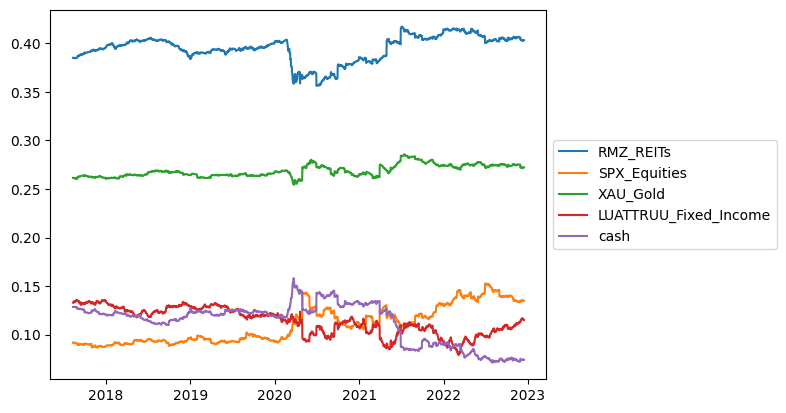

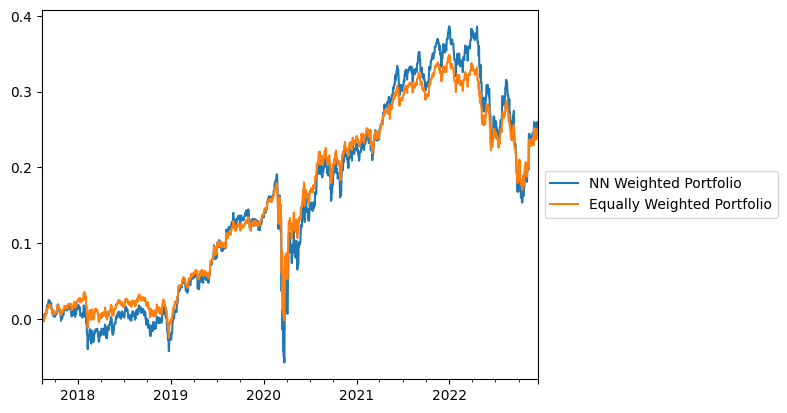

In [1]:
%run 03_neural_network_attempt.ipynb
import numpy as np
import pandas as pd
import importlib
import config
from datetime import datetime, timedelta
importlib.reload(config)

import warnings
# Suppress all warnings (not recommended unless you're sure)
warnings.filterwarnings("ignore")

In [3]:
##OPTIMISING

#learning rate
#min weight
#algo
#epochs
#window size

# depending on computational power, this might take a bit...

In [2]:
algos = [config.MAX_PROFIT, config.RISK_PARITY, config.MAX_SHARPE]
epochs = ["14D","20D"]

max_return = 0
for window_size in range(50,100,10):
    for learning_rate in np.arange(0.01, 0.02, 0.01):
        for min_weight in np.arange(0.02, 0.03, 0.01):
            for algo in algos:
                for epoch in epochs:
                    print("now optimising:", window_size, " " , learning_rate," ", min_weight," ", algo, " ", epoch)
                    #make predictions for long timeframe and copy the mse in new column

                    #generating training and test data:
                    #get_training_and_test_data(start_date, length, portfolio = config.MAX_SHARPE, window_size = 30, min_weight = 0.1,rf_rate = 0.02):
                    train_set, test_set = get_training_and_test_data("2012-01-01",500, portfolio = algo, window_size = 30, min_weight = 0.01,rf_rate = 0.02, freq = "D")

                    #train_set.iloc[:,0:11]     this is used as an input to train the model (only first 11 columns are the input indicators)
                    #train_set.iloc[:,11:]      this is used as targets to train the model (last 4 columns are the optimal weights )

                    #train neural network

                    trained_weights_input_hidden, trained_weights_hidden_output = train_neural_network(train_set.iloc[:,0:11], train_set.iloc[:,11:], learning_rate=0.1)

                    #make predictions
                    test_set, weight_predictions = predict_weights(test_set,trained_weights_input_hidden, trained_weights_hidden_output, freq = "D")

                    date_range = pd.date_range(start=weight_predictions.index.min(), end=weight_predictions.index.max(), freq='D')
                    start_date = date_range[0] - timedelta(days=1)
                    df_prices = get_indices(start_date.strftime("%Y-%m-%d"), date_range[-1].strftime("%Y-%m-%d")).pct_change().dropna()

                    #calculate and plot returns
                    preturn = (weight_predictions * df_prices).sum(axis=1)
                    total_return = preturn.cumsum()
                    if total_return[-1] > max_return:
                        max_return = total_return[-1]
                        optimal_combination = (window_size, " ", learning_rate," ", min_weight," ", algo," ",  epoch)
                        print("max_return: ", max_return)
                        print("window_size: ", window_size)
                        print("learning_rate: ", learning_rate)
                        print("min_weight: ", min_weight)
                        print("algo: ", algo)
                        print("epoch: ", epoch)

                                    

now optimising: 50   0.01   0.02   Max Profit   14D
Day 0, Mean Squared Error: 0.29182110791215343
Day 50, Mean Squared Error: 0.14958239476554272
Day 100, Mean Squared Error: 0.14219011360894485
Day 150, Mean Squared Error: 0.11490606538860162
Day 200, Mean Squared Error: 0.062357162153472576
Day 250, Mean Squared Error: 0.1572551147199186
Day 300, Mean Squared Error: 0.18642678680616984
Day 350, Mean Squared Error: 0.15463499918108745
Day 400, Mean Squared Error: 0.11723944826579832
Day 450, Mean Squared Error: 0.04556903110338984
Day 500, Mean Squared Error: 0.1392269141863008
max_return:  0.1034412114854856
window_size:  50
learning_rate:  0.01
min_weight:  0.02
algo:  Max Profit
epoch:  14D
now optimising: 50   0.01   0.02   Max Profit   20D
Day 0, Mean Squared Error: 0.29182110791215343
Day 50, Mean Squared Error: 0.14958239476554272
Day 100, Mean Squared Error: 0.14219011360894485
Day 150, Mean Squared Error: 0.11490606538860162
Day 200, Mean Squared Error: 0.062357162153472576


KeyboardInterrupt: 

In [9]:
optimal_combination

(50, ' ', 0.01, ' ', 0.02, ' ', 'Max Profit', ' ', '3D')